In [3]:
import numpy as np
import pandas as pd

In [4]:
boston_housing=pd.read_csv("BostonHousing.csv",header=0)

In [5]:
boston_housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Preprocessing 


In [6]:
boston_housing.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

## Checking whether the dataset has any NULL values

In [7]:
boston_housing.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

#### There are number of ways to replace the NULL values 
a) Removing the row which has a null value but we cannot do this beacuse  number of missing values is relatively more compared to the size of the dataset.
b) Replacing it with the constant values such as (mean, median, constant value etc)


### Locating the NULL values in the dataset

In [8]:
boston_housing['rm'].index[boston_housing['rm'].apply(np.isnan)]

Int64Index([10, 35, 63, 96, 135], dtype='int64')

In [9]:
boston_housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The describe() method gives statistical summary of the numerical columns within the dataset. The mean serves as an arithmetic average, providing a measure of the central tendency of the data, while the standard deviation quantifies the spread or dispersion around the mean. Minimum and maximum values showcase the range of observed data, and the inclusion of percentiles (25th, 50th, and 75th) offers a detailed depiction of the data distribution.

This summary encompasses key statistical measures that provide valuable insights into the central tendency, dispersion, and distribution of the numerical features


In [10]:
boston_housing.median()

crim         0.25651
zn           0.00000
indus        9.69000
chas         0.00000
nox          0.53800
rm           6.20800
age         77.50000
dis          3.20745
rad          5.00000
tax        330.00000
ptratio     19.05000
b          391.44000
lstat       11.36000
medv        21.20000
dtype: float64

The median and mean for the 'rm' is very similar, so we can replace the missing values or NULL values with the mean or median values as it will not effect the data

In [11]:
boston_housing['rm'].fillna(boston_housing['rm'].median(), inplace=True)

In [12]:
boston_housing.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

Now the NULL values is handled selection of the target variable and also feature variables and analyzing the relationships between those variables

Best way to find the relationships between the variable is doing Exploratory Data Analysis


In [13]:
target_variable = boston_housing.iloc[:, -1]
feature_variables = boston_housing.iloc[:, :-1] 

In [14]:
target_variable.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [15]:
feature_variables.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


C:\Users\mohda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mohda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mohda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

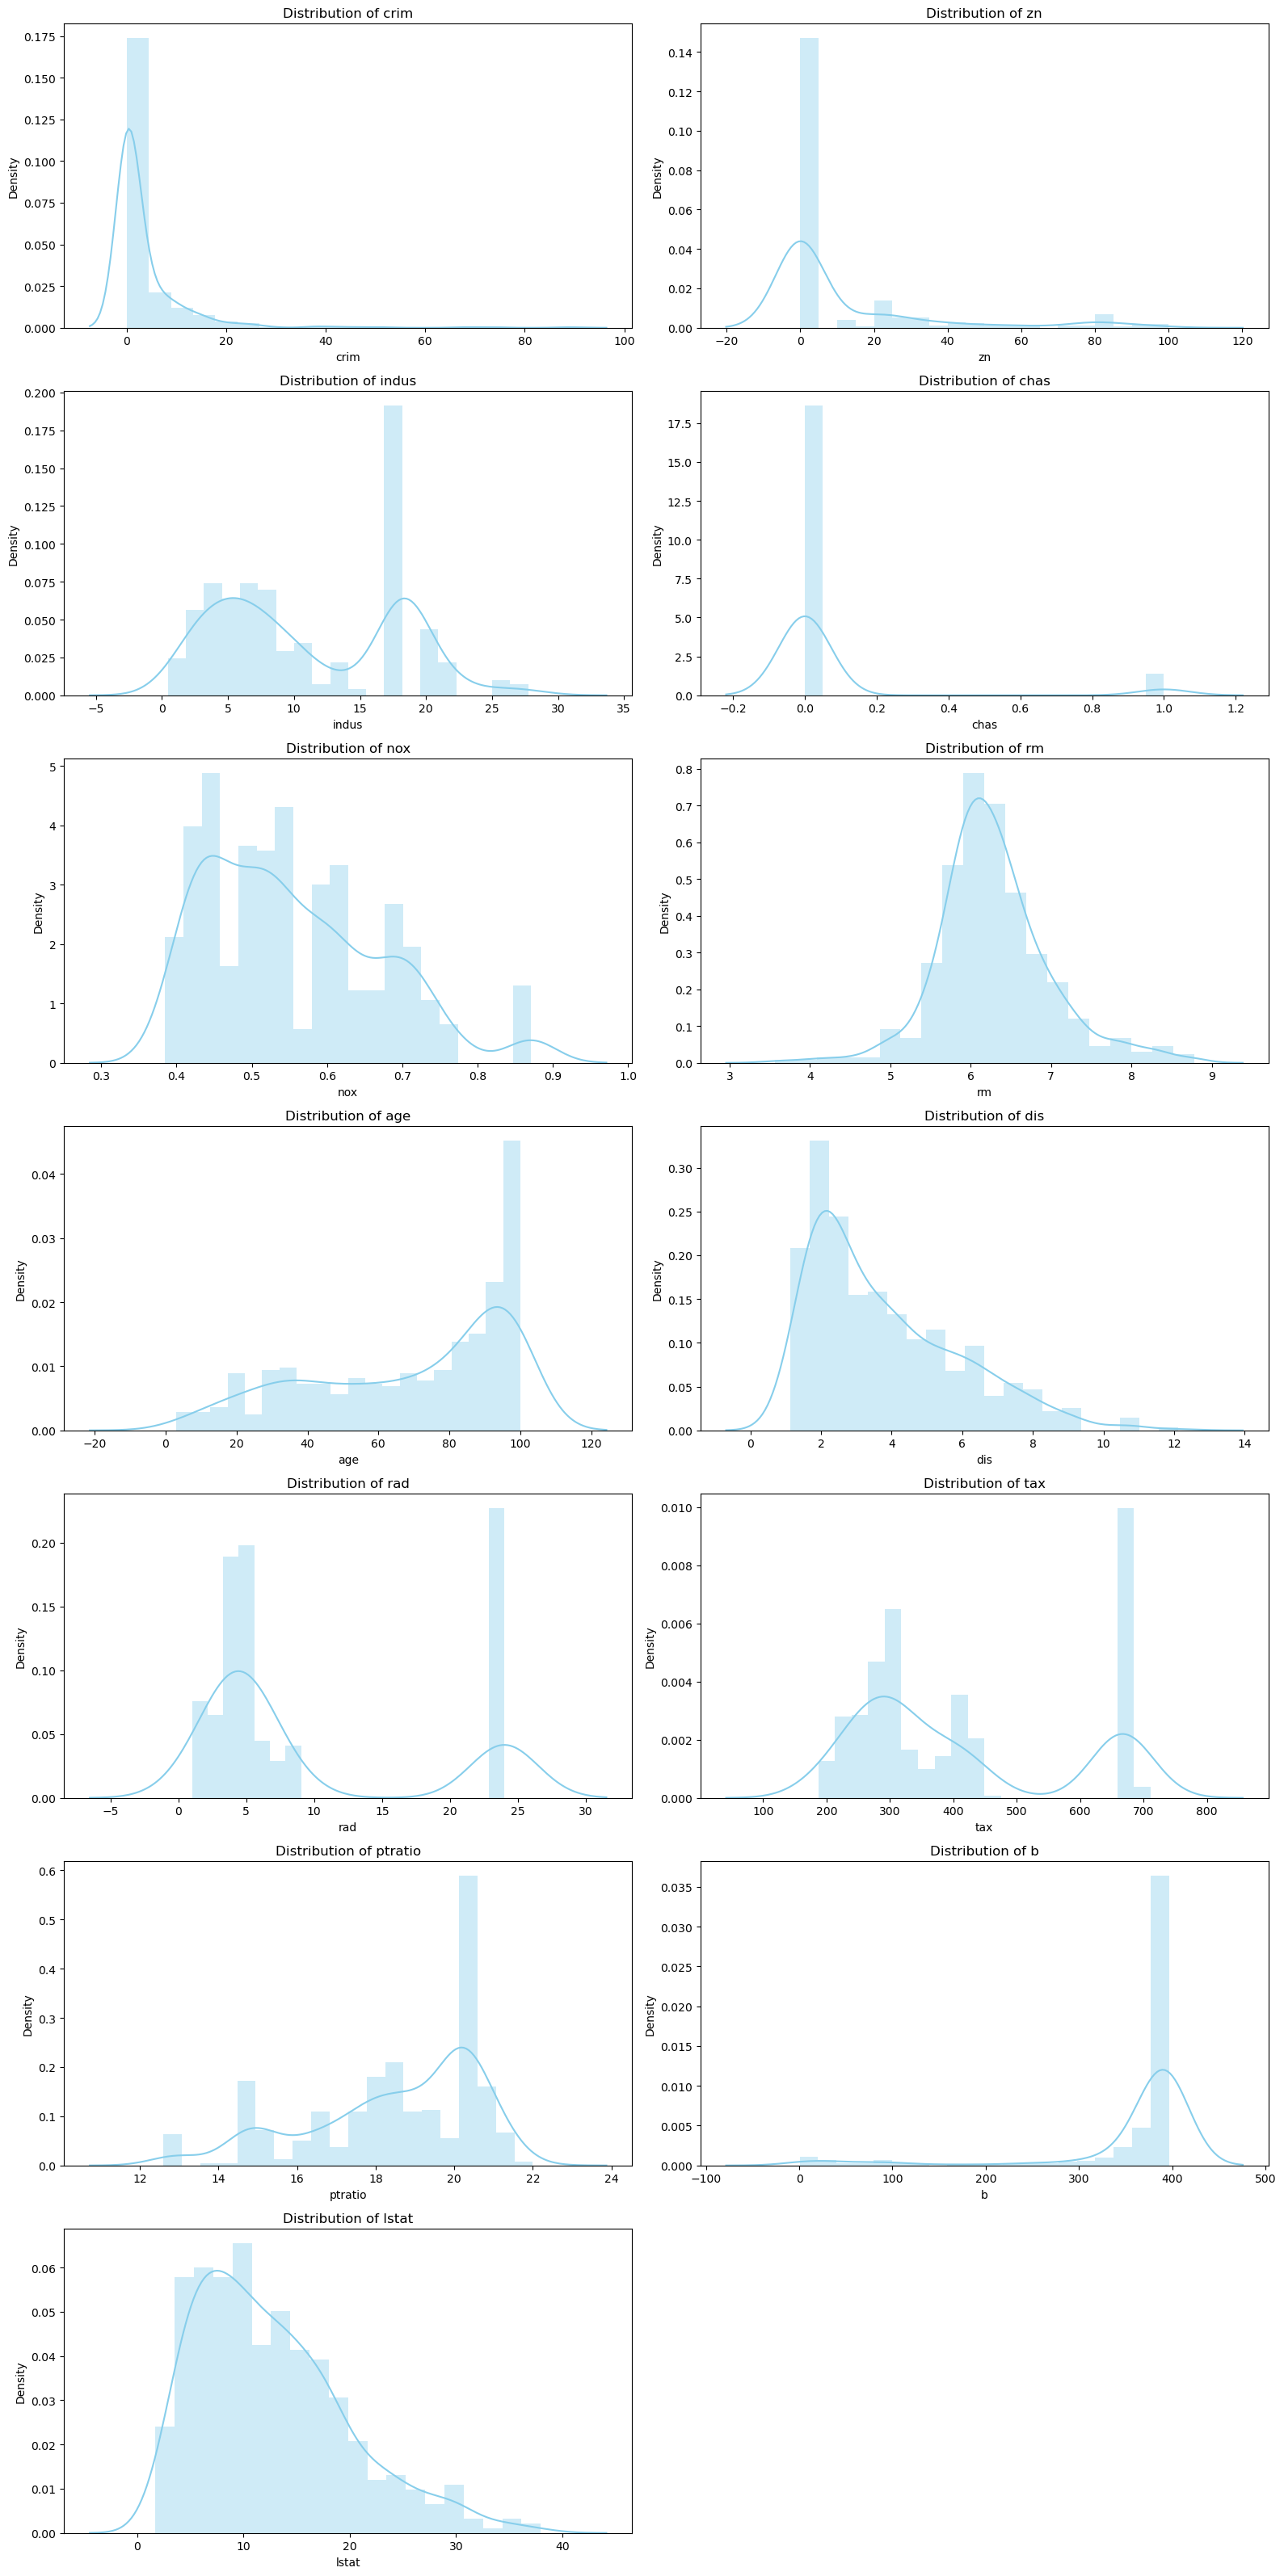

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the number of rows and columns for subplots
n_rows = (len(feature_variables.columns) + 1) // 2
n_cols = 2

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 32))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the distribution of each feature in separate subplots
for i, column in enumerate(feature_variables.columns):
    sns.distplot(feature_variables[column], bins=20, color='skyblue', ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Density")

# Hide empty subplots if the number of features is odd
if len(feature_variables.columns) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout and show plot
plt.tight_layout()
plt.show()


We can observe that the some of the graph observe that the values are not distributed asymmetry (high skewness) 
The graph that observe high skewness is 'crim', 'zn' and 'b'.
We also observe that the 'chas' varible is categorical with two values '0' and '1'

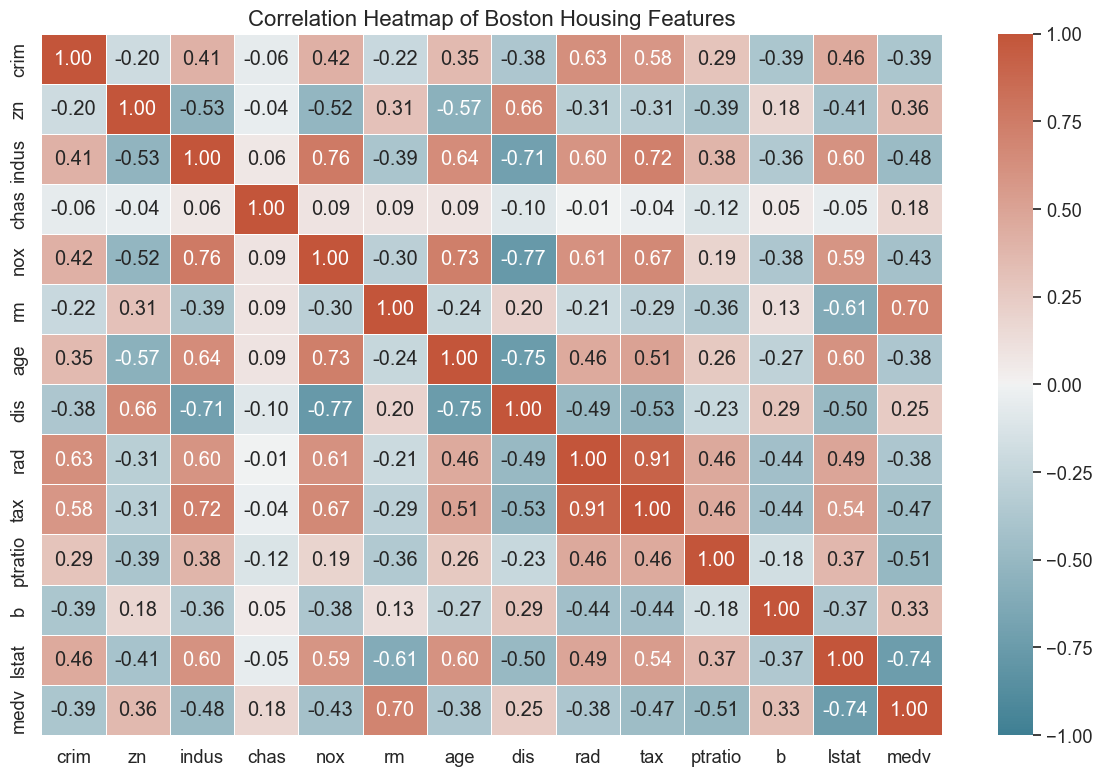

In [17]:
# Increase the figure size and font size
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.2)

# Customize the color palette
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create the heatmap
sns.heatmap(boston_housing.corr(), annot=True, cmap=cmap, center=0, vmin=-1, vmax=1, linewidths=0.5, linecolor='white', fmt=".2f")

# Add title
plt.title('Correlation Heatmap of Boston Housing Features', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


from the above correlation matrix the variable 'chas' doesnt seem to be correlated to anything 
The variable ‘tax’ and ‘rad’ have very high correlation.
So, the varaible chas can be dropped from the features_variable as it will not effect the model performance.

In [84]:
features=feature_variables.drop(['chas','rad'],axis=1)

In [85]:
def train_test_split(features, target_variable, test_size=0.2, random_state=None):
    if isinstance(features, pd.DataFrame):
        features = features.values
    if isinstance(target_variable, pd.Series):
        target_variable = target_variable.values
    
    if random_state is not None:
        np.random.seed(random_state)
    
    # Shuffle indices
    indices = np.arange(len(features))
    np.random.shuffle(indices)
    
    # Calculate the number of samples for the test set
    num_test_samples = int(test_size * len(features))
    
    # Split indices into train and test
    test_indices = indices[:num_test_samples]
    train_indices = indices[num_test_samples:]
    
    # Split features and target_variable into train and test sets
    X_train = features[train_indices]
    X_test = features[test_indices]
    y_train = target_variable[train_indices]
    y_test = target_variable[test_indices]
    
    return X_train, X_test, y_train, y_test


In [86]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        # Add a column of ones to X for the intercept term
        X = np.column_stack((np.ones(len(X)), X))
        
        # Calculate coefficients using closed-form solution (normal equation)
        self.coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        # Add a column of ones to X for the intercept term
        X = np.column_stack((np.ones(len(X)), X))
        
        # Make predictions
        return X @ self.coefficients




In [87]:
X_train, X_test, y_train, y_test = train_test_split(features, target_variable, test_size=0.2, random_state=42)
# Instantiate and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_train)

# Print coefficients
print("Intercept:", model.coefficients[0])
print("Slope:", model.coefficients[1])


Intercept: 23.236537021119084
Slope: -0.08486413910262164


In [88]:
import numpy as np

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def cross_val_score_custom(model, X_train, y_train, cv=10):
    n_samples = len(X_train)
    fold_size = n_samples // cv
    mse_scores = []

    for i in range(cv):
        # Splitting data into train and validation sets
        val_start = i * fold_size
        val_end = (i + 1) * fold_size
        val_X = X_train[val_start:val_end]
        train_X = np.concatenate([X_train[:val_start], X_train[val_end:]])
        val_y = y_train[val_start:val_end]
        train_y = np.concatenate([y_train[:val_start], y_train[val_end:]])

        # Training the model
        model.fit(train_X, train_y)

        # Making predictions
        val_pred = model.predict(val_X)

        # Calculating mean squared error
        mse = mean_squared_error(val_y, val_pred)
        mse_scores.append(mse)

    return np.array(mse_scores)

def r2_score(y_true, y_pred):
    # Calculate the total sum of squares
    total_sum_of_squares = np.sum((y_true - np.mean(y_true))**2)
    
    # Calculate the residual sum of squares
    residual_sum_of_squares = np.sum((y_true - y_pred)**2)
    
    # Calculate R-squared
    r2 = 1 - (residual_sum_of_squares / total_sum_of_squares)
    
    return r2

In [89]:
mse = mean_squared_error(y_train, predictions)
rmse = root_mean_squared_error(y_train, predictions) #mse**(0.5)
r2 = r2_score(y_train,predictions)

print("Train MSE:", mse)
print("Train RMSE:", rmse)
print("Train R-Squared:", r2)

Train MSE: 22.90771228329467
Train RMSE: 4.786200192563478
Train R-Squared: 0.7356712108379264


In [90]:
y_hat=model.predict(X_test)

mse = mean_squared_error(y_test, y_hat)
rmse = root_mean_squared_error(y_test, y_hat) #mse**(0.5)
r2 = r2_score(y_test,y_hat)
print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test R-Squared:", r2)

Test MSE: 27.371295815983032
Test RMSE: 5.231758386621369
Test R-Squared: 0.6304161997444673


In [91]:
# Usage
linear_scores = cross_val_score_custom(model, X_train, y_train)
print(linear_scores)


[13.67147921 18.56081622 30.64262407 47.68264016 23.15679509 31.11192712
 20.12877173 19.26566778 12.71179929 38.32903187]


## Dimensionality Reduction: This is done by using the PCA method


In [92]:
import numpy as np

def standard_scaler(X):
    mean = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)
    X_scaled = (X - mean) / std_dev
    return X_scaled

def explained_variance_ratio(eigenvalues):
    total_variance = np.sum(eigenvalues)
    explained_variance = eigenvalues / total_variance
    return explained_variance

def pca_variance_threshold(X, threshold):
    # Calculate covariance matrix
    cov_matrix = np.cov(X, rowvar=False)
    
    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Calculate explained variance ratio
    explained_variance_ratios = explained_variance_ratio(eigenvalues)
    
    # Find the number of principal components satisfying the threshold
    cumsum_variance_ratio = np.cumsum(explained_variance_ratios)
    num_components = np.argmax(cumsum_variance_ratio >= threshold) + 1
    
    # Extract the principal components
    principal_components = np.dot(X, eigenvectors[:, :num_components])
    
    return principal_components, explained_variance_ratios[:num_components]

# Example usage:
# Assuming feature_variables is a DataFrame and 'chas' is a column in it
features_without_chas = feature_variables.drop('chas', axis=1).values

# Standardize the features
x_scaled = standard_scaler(features_without_chas)

# Concatenate 'chas' column to the standardized features
x_with_chas = np.column_stack((x_scaled, feature_variables["chas"].values))

# Apply PCA with a variance threshold of 0.95
principal_components1, explained_variance = pca_variance_threshold(x_with_chas, threshold=0.95)

print(explained_variance)


[0.5077823  0.11137644 0.09813515 0.06923388 0.05511658 0.04456185
 0.03279204 0.02296884 0.01818564]


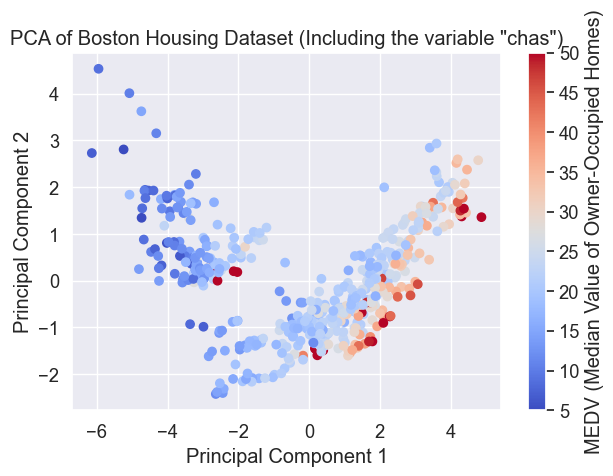

In [93]:
plt.scatter(principal_components1[:, 0], principal_components1[:, 1], c=boston_housing['medv'], cmap='coolwarm')
plt.colorbar(label='MEDV (Median Value of Owner-Occupied Homes)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Boston Housing Dataset (Including the variable "chas")')
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


## Now using the Library for the PCA reduction

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features_withoutchas = feature_variables.drop('chas', axis=1) 
x = StandardScaler().fit_transform(features_withoutchas)
x=pd.DataFrame(x)
x=pd.concat([x,feature_variables["chas"]],axis=1)
x=np.array(x)

pca = PCA(.95)

principalComponents = pca.fit_transform(x)

In [23]:
pca.explained_variance_ratio_

array([0.5077823 , 0.11137644, 0.09813515, 0.06923388, 0.05511658,
       0.04456185, 0.03279204, 0.02296884, 0.01818564])

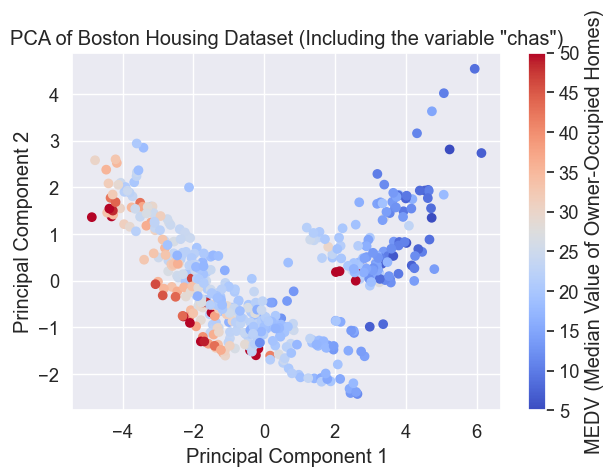

In [24]:
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=boston_housing['medv'], cmap='coolwarm')
plt.colorbar(label='MEDV (Median Value of Owner-Occupied Homes)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Boston Housing Dataset (Including the variable "chas")')
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [25]:
x_no_chas = StandardScaler().fit_transform(features_withoutchas)

principalComponents_no_chas = pca.fit_transform(x_no_chas)


In [26]:
x_no_chas.shape

(506, 12)

In [27]:
pca.explained_variance_ratio_

array([0.5105062 , 0.1118566 , 0.09850995, 0.06960532, 0.05539612,
       0.04479236, 0.03296535, 0.02309006, 0.01828248])

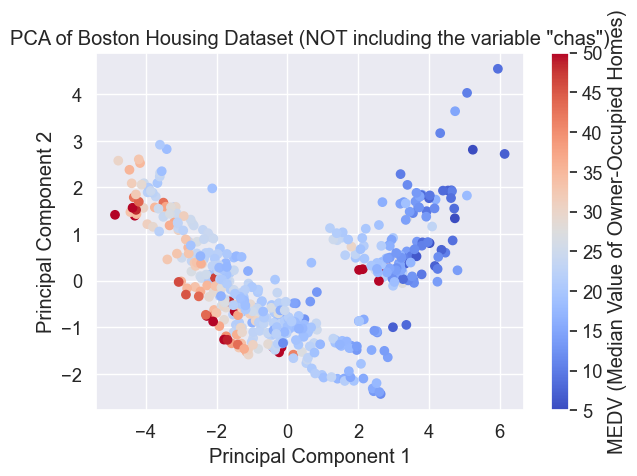

In [28]:
plt.scatter(principalComponents_no_chas[:, 0], principalComponents_no_chas[:, 1], c=boston_housing['medv'], cmap='coolwarm')
plt.colorbar(label='MEDV (Median Value of Owner-Occupied Homes)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Boston Housing Dataset (NOT including the variable "chas")')
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


# RandomForestRegressor
    
    With feature selection

In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [137]:
## first train simple regressor tree
X_train, X_test, y_train, y_test = train_test_split(features, target_variable, test_size=0.2, random_state=42)
DTregressor = DecisionTreeRegressor(random_state=42).fit(X_train,y_train)


In [108]:
#DTregressor.score(X_train,y_train) #R^2 of train test
train_r2 = DTregressor.score(X_train, y_train)
test_r2 = DTregressor.score(X_test, y_test)
print("R^2 of train set:", train_r2)
print("R^2 of test set:", test_r2)


R^2 of train set: 1.0
R^2 of test set: 0.8531638479520621


In [109]:
DTregressor.score(X_test,y_test) #R^2 of test set

0.8531638479520621

In [110]:
DT_scores = cross_val_score(DTregressor, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
print(-DT_scores)

[15.6602439  18.37902439 20.00658537 44.35560976 75.89829268 13.99925
 26.3305     23.053      14.83975    25.80275   ]


In [112]:
import sklearn.metrics as metrics
print("MSE DT test: ", metrics.mean_squared_error(y_test,(DTregressor.predict(X_test))))

MSE DT test:  10.874653465346533


In [113]:
DTregressor.get_depth()

19

In [114]:
DTregressor.get_n_leaves()

383

In [115]:
clf = GridSearchCV(DecisionTreeRegressor(random_state=42), {
    'max_depth': np.arange(1,20),
    'splitter': ['best','random'],
    'max_leaf_nodes': np.arange(2,400)
}, cv=10, return_train_score=False)
clf.fit(X_train, y_train)
DTgridcvresults=pd.DataFrame(clf.cv_results_)
DTgridcvresults

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_splitter,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001200,0.000400,0.000700,0.000458,1,2,best,"{'max_depth': 1, 'max_leaf_nodes': 2, 'splitte...",0.479811,0.477995,...,-0.056722,0.432450,0.578029,0.480562,0.321557,0.314322,0.266129,0.371080,0.168409,14293
1,0.000951,0.000351,0.000401,0.000491,1,2,random,"{'max_depth': 1, 'max_leaf_nodes': 2, 'splitte...",0.211952,0.301034,...,0.400615,0.293442,0.359816,0.459168,0.346395,0.315603,0.277051,0.337676,0.069306,14709
2,0.001500,0.000922,0.000400,0.000490,1,3,best,"{'max_depth': 1, 'max_leaf_nodes': 3, 'splitte...",0.479811,0.477995,...,-0.056722,0.432450,0.578029,0.480562,0.321557,0.314322,0.266129,0.371080,0.168409,14293
3,0.000800,0.000400,0.000500,0.000500,1,3,random,"{'max_depth': 1, 'max_leaf_nodes': 3, 'splitte...",0.211952,0.301034,...,0.400615,0.293442,0.359816,0.459168,0.346395,0.315603,0.277051,0.337676,0.069306,14709
4,0.001200,0.000399,0.000700,0.000640,1,4,best,"{'max_depth': 1, 'max_leaf_nodes': 4, 'splitte...",0.479811,0.477995,...,-0.056722,0.432450,0.578029,0.480562,0.321557,0.314322,0.266129,0.371080,0.168409,14293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15119,0.001900,0.000300,0.000500,0.000500,19,397,random,"{'max_depth': 19, 'max_leaf_nodes': 397, 'spli...",0.655928,0.610892,...,0.174423,0.706935,0.799913,0.695820,0.730736,0.774332,0.600886,0.650461,0.170561,10151
15120,0.003953,0.000469,0.000600,0.000490,19,398,best,"{'max_depth': 19, 'max_leaf_nodes': 398, 'spli...",0.771665,0.775452,...,0.309894,0.514517,0.839746,0.809704,0.604319,0.803755,0.639405,0.690231,0.164175,4181
15121,0.001901,0.000300,0.000400,0.000490,19,398,random,"{'max_depth': 19, 'max_leaf_nodes': 398, 'spli...",0.655928,0.610892,...,0.174423,0.706935,0.799913,0.695820,0.730736,0.774332,0.600886,0.650461,0.170561,10151
15122,0.003802,0.000401,0.000400,0.000489,19,399,best,"{'max_depth': 19, 'max_leaf_nodes': 399, 'spli...",0.771665,0.775452,...,0.309894,0.514517,0.839746,0.809704,0.604319,0.803755,0.639405,0.690231,0.164175,4181


In [116]:
print(clf.best_estimator_,clf.best_score_,)

DecisionTreeRegressor(max_depth=7, max_leaf_nodes=29, random_state=42,
                      splitter='random') 0.7100904434283357


In [117]:
bestDTpred=clf.predict(X_test)

print("Grid CV R^2 DT Test: ", metrics.r2_score(y_test,bestDTpred))
print("Grid CV MSE DT Test: ", metrics.mean_squared_error(y_test,bestDTpred))

Grid CV R^2 DT Test:  0.7848035338857637
Grid CV MSE DT Test:  15.937403448133821


In [120]:
clf.best_estimator_.feature_importances_

array([0.01488431, 0.00952119, 0.01998293, 0.02950654, 0.39235536,
       0.02285323, 0.01266882, 0.03538937, 0.00893408, 0.01809506,
       0.4358091 ])

In [139]:
pd.DataFrame({"Features": X_train.columns, "Importance":clf.best_estimator_.feature_importances_})

,Features,Importance
0,crim,0.014884
1,zn,0.009521
2,indus,0.019983
3,nox,0.029507
4,rm,0.392355
5,age,0.022853
6,dis,0.012669
7,tax,0.035389
8,ptratio,0.008934
9,b,0.018095


## Feature Selection
Remove worst feature indicated from above model and retrain (with cv) on the same Decision Tree Regressor

In [140]:
features_nopratio=features.drop(["ptratio"],axis=1)

In [141]:
X_trainfs, X_testfs, y_trainfs, y_testfs = train_test_split(features_nopratio, target_variable, test_size=0.2, random_state=42)

In [142]:
rf=RandomForestRegressor(random_state=42).fit(X_test,y_test)
RF_scores = cross_val_score(rf, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
print(-RF_scores)

[10.56036073 12.15675563  8.72922778 30.5595068  21.45330145  9.0509244
 15.1831219   7.36906203  5.9624431  24.4072843 ]


In [143]:
print("train set RF R^2: ", rf.score(X_train,y_train))
print("test set RF R^2: ", rf.score(X_test,y_test))

train set RF R^2:  0.8146972847430404
test set RF R^2:  0.9693605585307042


In [144]:
rfpred=rf.predict(X_test)
print("test set RF MSE: ", metrics.mean_squared_error(rfpred,y_test))

test set RF MSE:  2.2469061568627438


In [145]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [146]:
clf_rf = GridSearchCV(RandomForestRegressor(random_state=42), {
    'max_depth': np.arange(1,20),
    'n_estimators': np.arange(50,150),
}, cv=10, return_train_score=False)
clf_rf.fit(X_train, y_train)
RFgridcvresults=pd.DataFrame(clf_rf.cv_results_)
RFgridcvresults

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.079622,0.002676,0.007851,0.000711,1,50,"{'max_depth': 1, 'n_estimators': 50}",0.625816,0.593433,0.533287,0.062886,0.584659,0.651468,0.592669,0.568430,0.600758,0.415280,0.522869,0.164990,1869
1,0.081274,0.001913,0.008101,0.000536,1,51,"{'max_depth': 1, 'n_estimators': 51}",0.627426,0.593923,0.531825,0.061034,0.583551,0.651884,0.592058,0.566803,0.597268,0.414418,0.522019,0.165435,1873
2,0.086429,0.010054,0.008300,0.000900,1,52,"{'max_depth': 1, 'n_estimators': 52}",0.628685,0.593992,0.531587,0.061955,0.581871,0.652514,0.593042,0.567609,0.593937,0.413396,0.521859,0.165231,1876
3,0.085505,0.004273,0.008353,0.000837,1,53,"{'max_depth': 1, 'n_estimators': 53}",0.629867,0.593611,0.535475,0.060735,0.580568,0.653734,0.592660,0.567225,0.594775,0.411697,0.522035,0.165830,1872
4,0.089770,0.004446,0.008303,0.000461,1,54,"{'max_depth': 1, 'n_estimators': 54}",0.630041,0.594096,0.534275,0.059118,0.583022,0.651999,0.591696,0.569645,0.591282,0.410747,0.521592,0.166195,1880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,0.530318,0.018119,0.021946,0.003039,19,145,"{'max_depth': 19, 'n_estimators': 145}",0.831714,0.861170,0.931798,0.540757,0.785568,0.907508,0.885825,0.887536,0.912552,0.671740,0.821617,0.118560,70
1896,0.565705,0.068022,0.020939,0.003129,19,146,"{'max_depth': 19, 'n_estimators': 146}",0.832015,0.861111,0.931322,0.541663,0.785727,0.907962,0.886140,0.887754,0.912750,0.674882,0.822133,0.117980,36
1897,0.541139,0.011565,0.021439,0.003085,19,147,"{'max_depth': 19, 'n_estimators': 147}",0.831395,0.860700,0.930497,0.540363,0.784714,0.907949,0.886037,0.888296,0.912106,0.674647,0.821670,0.118229,67
1898,0.553194,0.016151,0.021331,0.002100,19,148,"{'max_depth': 19, 'n_estimators': 148}",0.831926,0.861157,0.930059,0.539192,0.785429,0.908259,0.885549,0.888762,0.912360,0.674301,0.821699,0.118550,64


In [147]:
print(clf_rf.best_estimator_,clf_rf.best_score_,)

RandomForestRegressor(max_depth=13, n_estimators=146, random_state=42) 0.8236368259793689


In [148]:
bestRFpred=clf_rf.predict(X_test)

print("Grid CV R^2 Rf Test: ", metrics.r2_score(y_test,bestRFpred))
print("Grid CV MSE RF Test: ", metrics.mean_squared_error(y_test,bestRFpred))

Grid CV R^2 Rf Test:  0.8758813347061408
Grid CV MSE RF Test:  9.102091286808575


Of all experiments, the best model performance was the default Random Forest Regressor with a R^2 of 96.9%
and MSE of 2.247